In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
run_dir = Path("../eval/l4_full")

df_model = pd.read_csv(run_dir / "model_metrics.csv")
df_cmp = pd.read_csv(run_dir / "genre_compare.csv")

df_gen_cls = pd.read_csv(
    run_dir / "genre_classifier" / "generated_genre_consistency.csv"
)

display(df_model)
display(df_cmp.head())
display(df_gen_cls)

,split,loss,ppl
0,val,0.666692,1.947784
1,test,0.679939,1.973757


,genre,n_real,n_gen,pitch_class_kl,density_kl,polyphony_kl,duration_kl,pitch_range_diff,note_count_diff
0,classical,25,25,2.348676,12.631949,23.599687,5.684762,48.860000,3830.143333
1,country,11,25,0.566505,13.815511,26.532409,11.487394,46.267045,5020.852273
2,disco,16,25,0.908134,18.551695,26.619617,9.422148,52.789773,5809.840909
3,electronic,25,25,0.487745,20.817267,25.754748,13.048250,54.734783,5105.608696
4,folk,9,25,0.206191,26.937874,25.883153,12.761102,50.863636,4322.125000


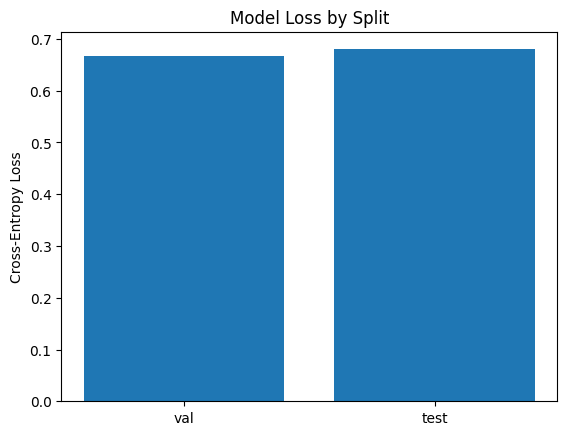

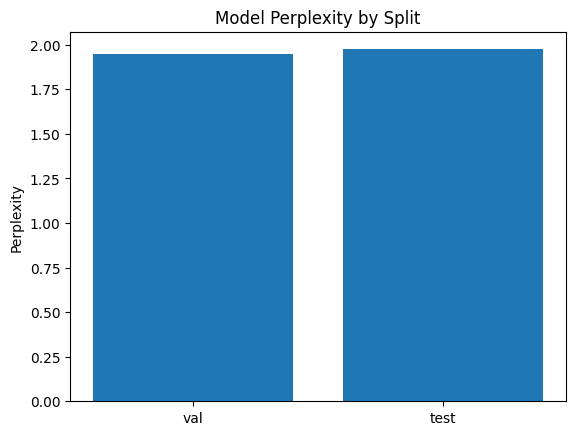

In [5]:
plt.figure()
plt.bar(df_model["split"], df_model["loss"])
plt.title("Model Loss by Split")
plt.ylabel("Cross-Entropy Loss")
plt.show()

plt.figure()
plt.bar(df_model["split"], df_model["ppl"])
plt.title("Model Perplexity by Split")
plt.ylabel("Perplexity")
plt.show()

Lower perplexity on validation/test indicates the model generalizes beyond memorization.

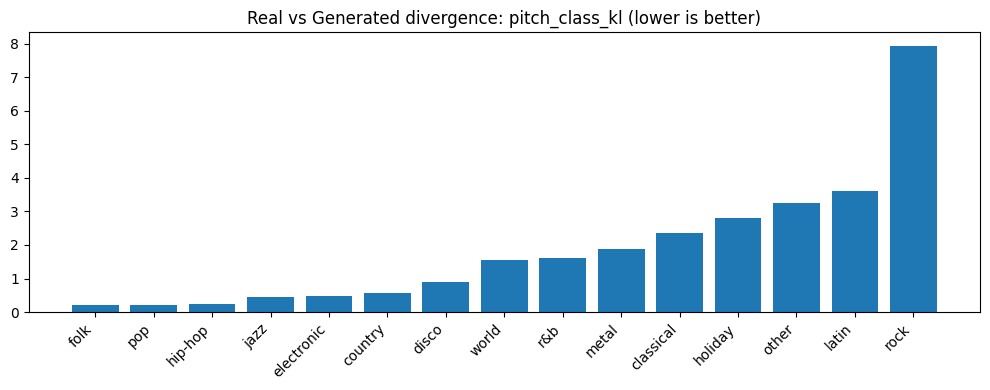

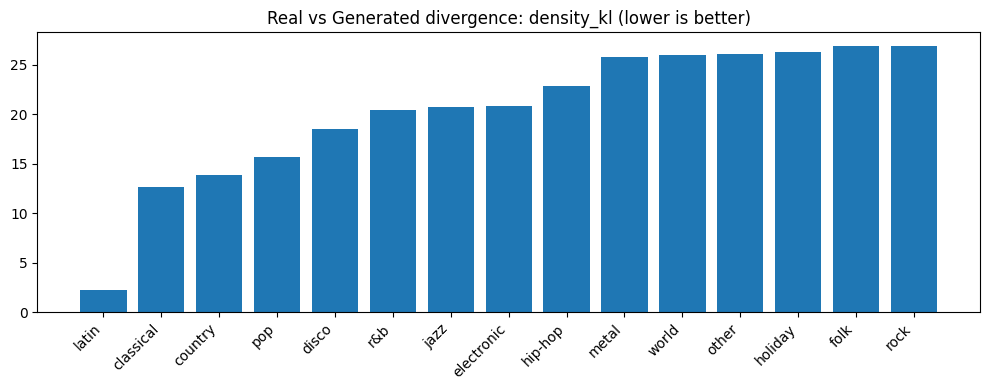

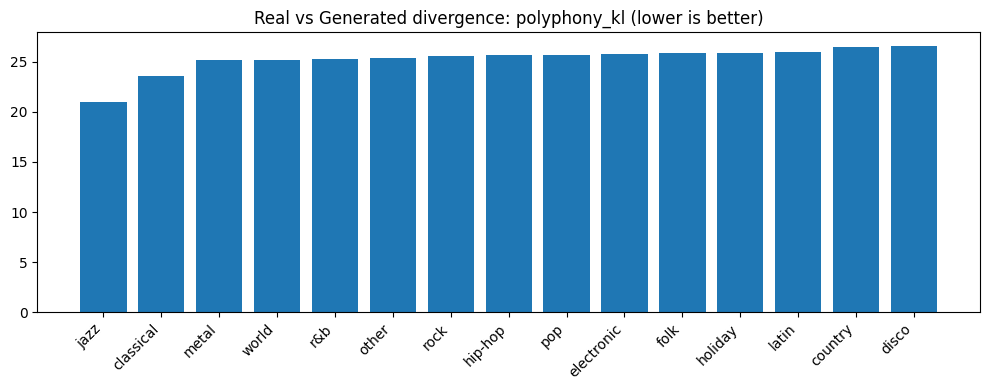

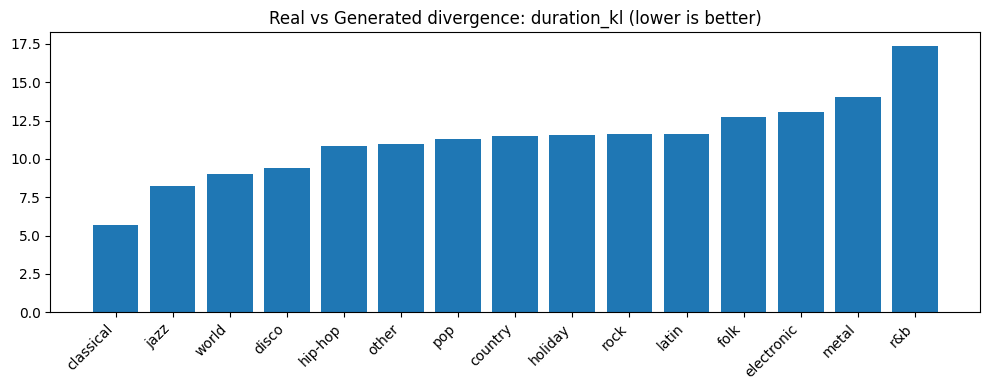

In [6]:
for col in ["pitch_class_kl", "density_kl", "polyphony_kl", "duration_kl"]:
    plt.figure(figsize=(10,4))
    s = df_cmp.sort_values(col)
    plt.bar(s["genre"], s[col])
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Real vs Generated divergence: {col} (lower is better)")
    plt.tight_layout()
    plt.show()

These divergences quantify how closely generated music matches real music statistics per genre.

In [7]:
plt.figure(figsize=(10,4))
plt.bar(df_gen_cls["genre"], df_gen_cls["predicted_genre_accuracy"])
plt.xticks(rotation=45, ha="right")
plt.ylim(0,1)
plt.title("Genre consistency of generated samples")
plt.ylabel("P(classifier predicts target genre)")
plt.tight_layout()
plt.show()

NameError: name 'df_gen_cls' is not defined

<Figure size 1000x400 with 0 Axes>

If a classifier trained only on real music identifies generated samples as the intended genre, this suggests strong genre conditioning.

In [ ]:
gen_dir = run_dir / "generated"

for genre in sorted(df_gen_cls["genre"]):
    files = list((gen_dir / genre).glob("*.mid"))[:3]
    print(genre, "examples:", [f.name for f in files])